In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os, glob

In [2]:
path = os.path.join(os.path.dirname(os.getcwd()), '../Data/Extracted_data/')
os.chdir(path)

In [3]:
MBN = pd.read_csv('MBN.csv', index_col='Sample')
MBN['peak_ratio'] = MBN['peak']/MBN['peak_ref']
MBN['fwhm_ratio'] = MBN['fwhm']/MBN['fwhm_ref']
MBN['diff_two_peaks_ratio'] = MBN['diff_two_peaks']/MBN['diff_two_peaks_ref']
MBN['amp_ratio'] = MBN['amp']/MBN['amp_ref']
MBN['pos_ratio'] = MBN['pos']/MBN['pos_ref']
MBN['energy_ratio'] = MBN['energy']/MBN['energy_ref']


In [4]:
fatigue = pd.read_excel('FatigueSampleInventory.xlsx', 
                        index_col=' Specimen ID',
                        usecols=[' Specimen ID', 'Cycles at NDE Test', 'Cycles at Failure', 'Current Unfailed Cycles']
                       )
fatigue.rename(columns={' Specimen ID':'ID', 'Cycles at NDE Test':'NDE_cyle', 'Cycles at Failure':'failure_cycle', 'Current Unfailed Cycles':'unfailed_cycle'}, inplace=True)
fatigue['f'] = fatigue['NDE_cyle']/fatigue['failure_cycle']


In [5]:
sample_names = MBN.index.unique()
sample_names

Index(['41C', '43C', '44C', '45C', '13C', '35C', '7C', '8C', '10C', '24C',
       '34C', '9C', '19C', '30C', '32C', '46C', '21C', '23C', '25C', '47C',
       '26C', '27C', '28C', '48C', '37C', '39C', '42C', '49C', '14C', '16C',
       '20C', '38C', '29C', '31C', '36C', '6C'],
      dtype='object', name='Sample')

In [6]:
merged = fatigue.join([MBN], how='left')


In [7]:
merged.dropna(subset=['f'], inplace=True)


In [8]:
merged = merged.sort_values(by='f')


In [9]:
merged['f'] = np.round(merged['f'], 3)

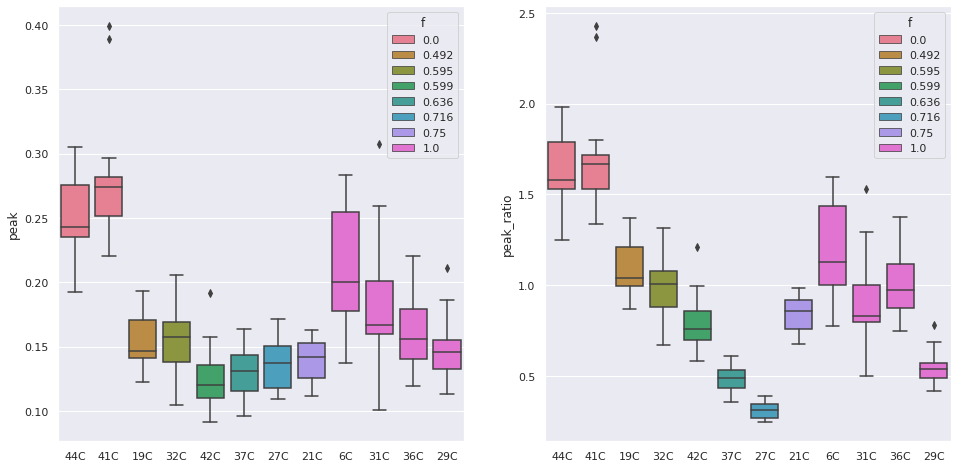

In [27]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(16,8))
sns.boxplot(x=merged.index, y=merged['peak'], orient='v', ax=axes[0], palette=sns.color_palette('husl', n_colors=8), hue=merged['f'], dodge=False)
sns.boxplot(x=merged.index, y=merged['peak_ratio'], orient='v', ax=axes[1], palette=sns.color_palette('husl', n_colors=8), hue=merged['f'], dodge=False)
sns.set(rc={'figure.figsize': (12,6)})


In [30]:
['peak_ratio'] = MBN['peak']/MBN['peak_ref']
MBN['fwhm_ratio'] = MBN['fwhm']/MBN['fwhm_ref']
MBN['diff_two_peaks_ratio'] = MBN['diff_two_peaks']/MBN['diff_two_peaks_ref']
MBN['amp_ratio'] = MBN['amp']/MBN['amp_ref']
MBN['pos_ratio'] = MBN['pos']/MBN['pos_ref']
#MBN['energy_ratio'

#fig, axes = plt.subplots(1, 2, sharex=False, figsize=(16,8))
#def plot_val_vs_ratio(col):
    

SyntaxError: cannot assign to literal (<ipython-input-30-ac50e9127b23>, line 1)

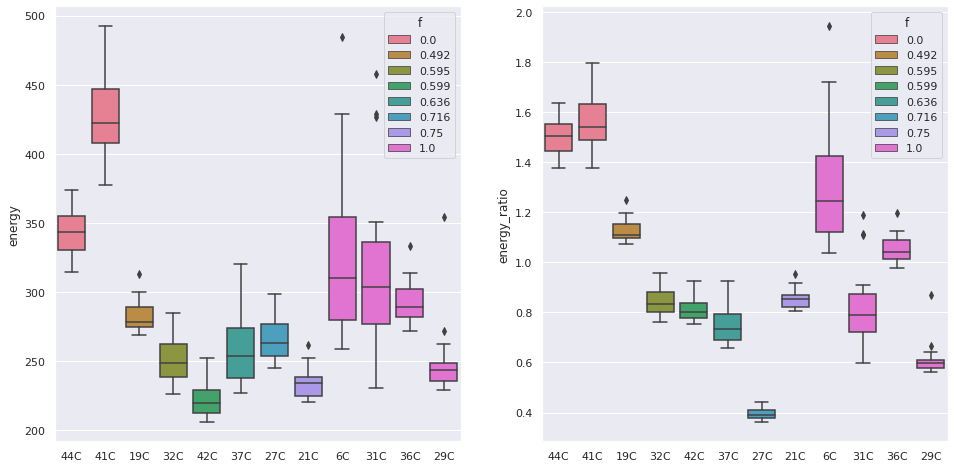

In [29]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(16,8))
sns.boxplot(x=merged.index, y=merged['energy'], orient='v', ax=axes[0], palette=sns.color_palette('husl', n_colors=8), hue=merged['f'], dodge=False)
sns.boxplot(x=merged.index, y=merged['energy_ratio'], orient='v', ax=axes[1], palette=sns.color_palette('husl', n_colors=8), hue=merged['f'], dodge=False)
sns.set(rc={'figure.figsize': (8,4.5)})

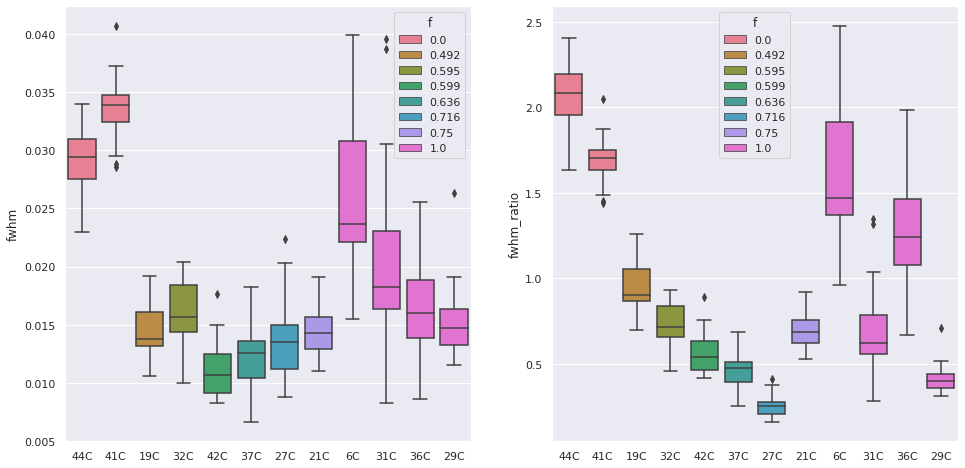

In [31]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(16,8))
sns.boxplot(x=merged.index, y=merged['fwhm'], orient='v', ax=axes[0], palette=sns.color_palette('husl', n_colors=8), hue=merged['f'], dodge=False)
sns.boxplot(x=merged.index, y=merged['fwhm_ratio'], orient='v', ax=axes[1], palette=sns.color_palette('husl', n_colors=8), hue=merged['f'], dodge=False)
sns.set(rc={'figure.figsize': (16,6)})

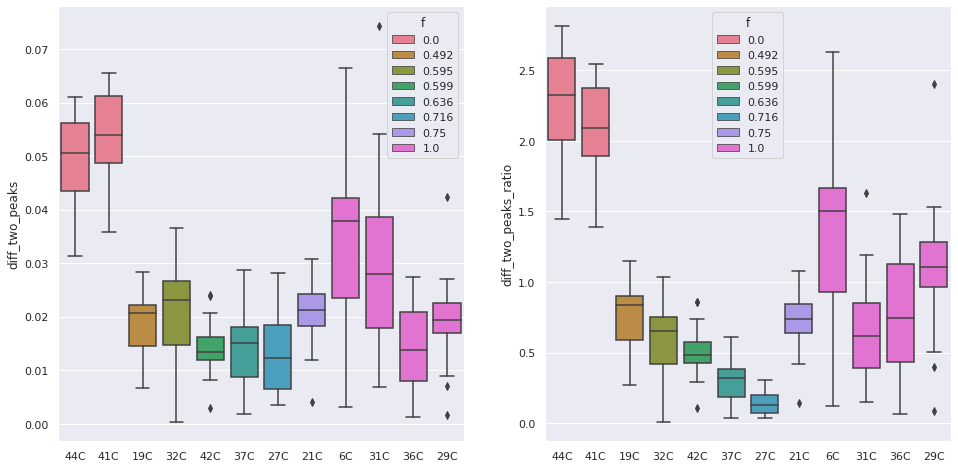

In [32]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(16,8))
sns.boxplot(x=merged.index, y=merged['diff_two_peaks'], orient='v', ax=axes[0], palette=sns.color_palette('husl', n_colors=8), hue=merged['f'], dodge=False)
sns.boxplot(x=merged.index, y=merged['diff_two_peaks_ratio'], orient='v', ax=axes[1], palette=sns.color_palette('husl', n_colors=8), hue=merged['f'], dodge=False)
sns.set(rc={'figure.figsize': (12,6)})